<a href="https://colab.research.google.com/github/gonbey/AdminLTE/blob/master/FaceRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=0e674fe0e14292a9f9ecb2113bd2a5e3d9de7bc31e85885760a412ec157f0e51
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114250 sha256=59c6808e105cd69aa3c0e6744cf32abfc2830bd5eba4eb8001257b7456fbd8fe
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [ ]:
!wget http://dlib.net/files/mmod_human_face_detector.dat.bz2
!bzip2 -d mmod_human_face_detector.dat.bz2

--2024-10-09 19:39:51--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K   929KB/s    in 0.7s    

2024-10-09 19:39:52 (929 KB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



,ID,ファイル名,顔写真
0,1,Atal_Bihari_Vajpayee_0007.jpg,
1,2,Artieas_Shanks_0001.jpg,
2,3,Arnold_Schwarzenegger_0042.jpg,
3,3,Arnold_Schwarzenegger_0006.jpg,
4,4,Ari_Fleischer_0007.jpg,
5,5,Astou_Ndiaye-Diatta_0001.jpg,
6,6,Art_Cooper_0001.jpg,
7,3,Arnold_Schwarzenegger_0015.jpg,
8,7,Augusto_Roa_Bastos_0001.jpg,
9,3,Arnold_Schwarzenegger_0010.jpg,

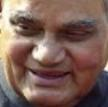
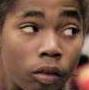
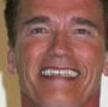
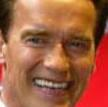
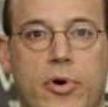
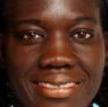
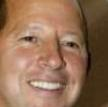
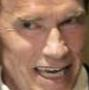
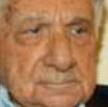
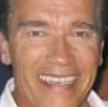
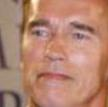
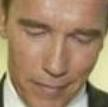
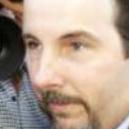
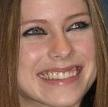
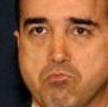
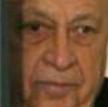
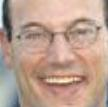
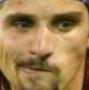
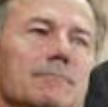
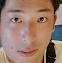
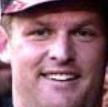
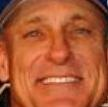
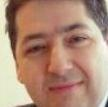
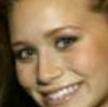
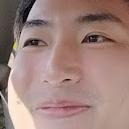
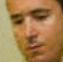
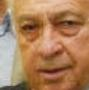
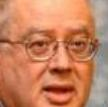
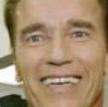
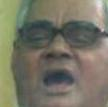
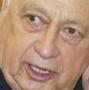
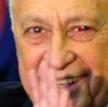
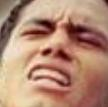
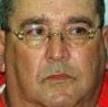
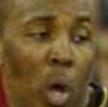
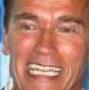
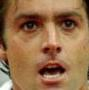
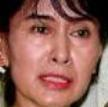
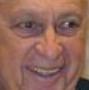
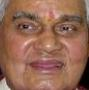
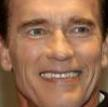
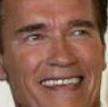
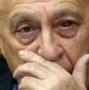
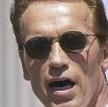
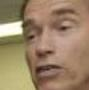
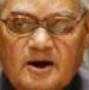
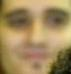
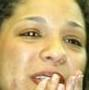
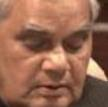
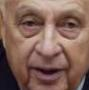
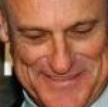
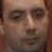
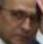
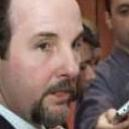
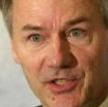
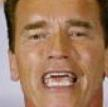
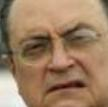
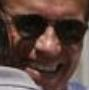
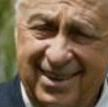
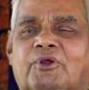
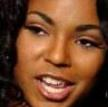
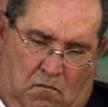
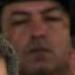
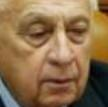
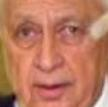
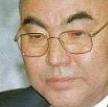
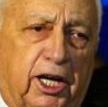
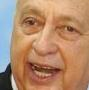
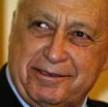
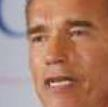
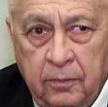
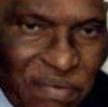
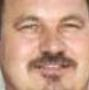
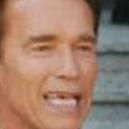
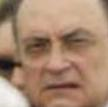
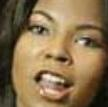
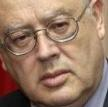
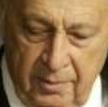
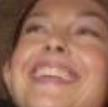
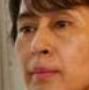
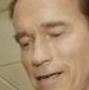
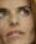
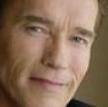
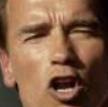
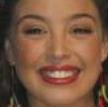
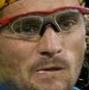
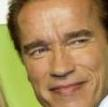
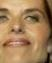
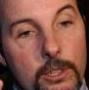
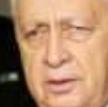
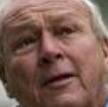
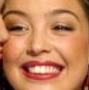
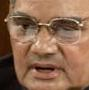
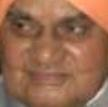
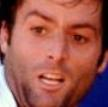
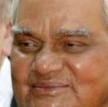
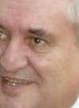
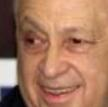
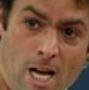
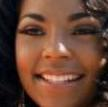
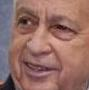
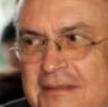
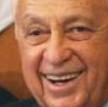
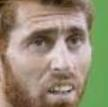
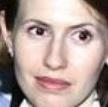
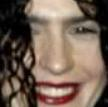
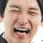
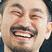
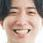
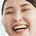
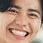
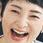
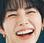
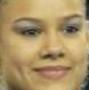
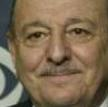
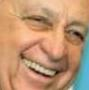
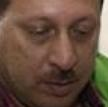
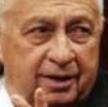
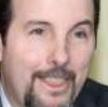
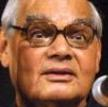
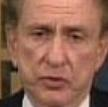
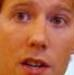
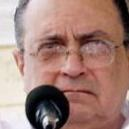
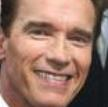
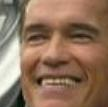
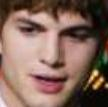
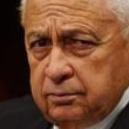
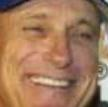
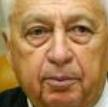
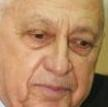
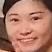
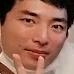
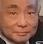
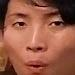
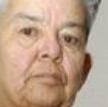
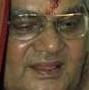
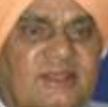
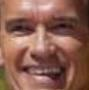
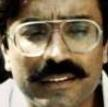
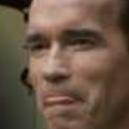
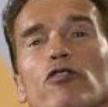
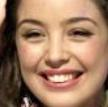
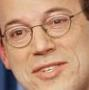
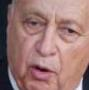
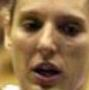
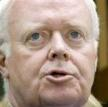
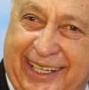
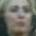
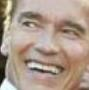
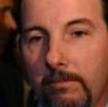
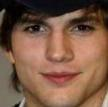
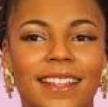
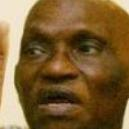
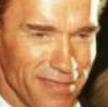
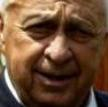
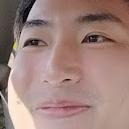
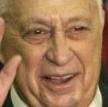
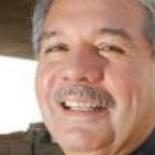
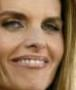
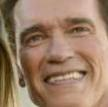
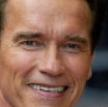
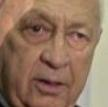
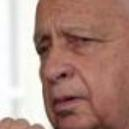
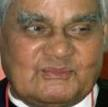
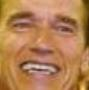
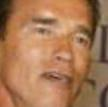
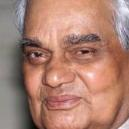
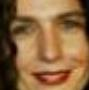
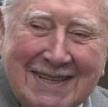
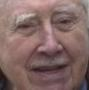
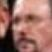
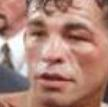
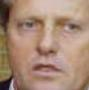
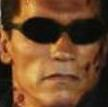
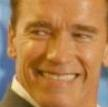
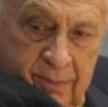
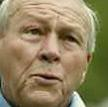
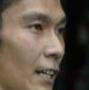
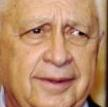
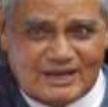
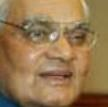
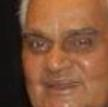
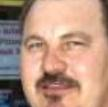
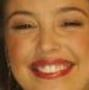
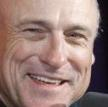
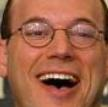
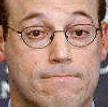
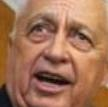
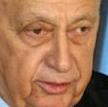
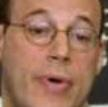
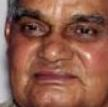
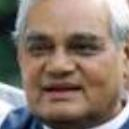
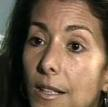
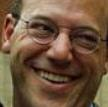
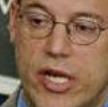
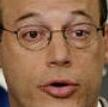
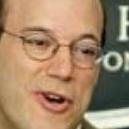
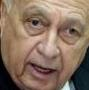
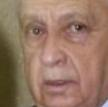
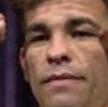
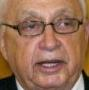
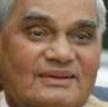
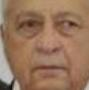
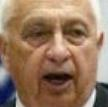
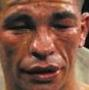
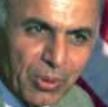
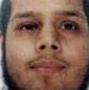
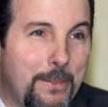
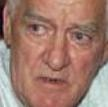
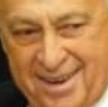
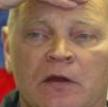
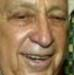
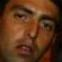
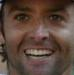
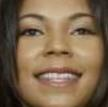
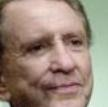
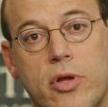
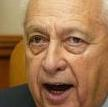
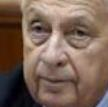
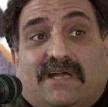
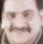
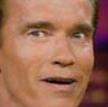
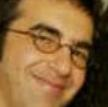
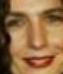
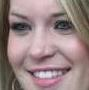
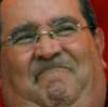
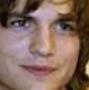
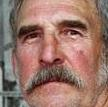
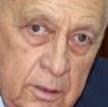
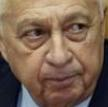
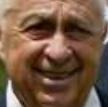
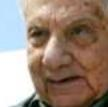
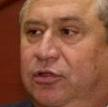
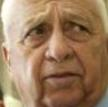
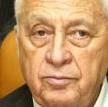
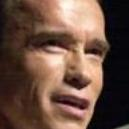
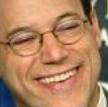
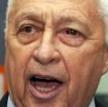
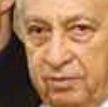
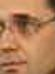
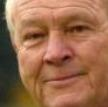
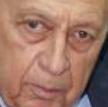
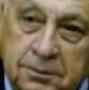
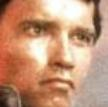
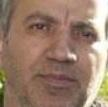
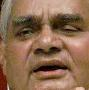
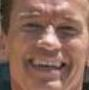
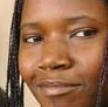
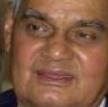
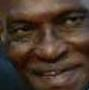
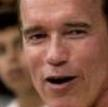
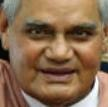
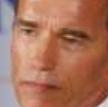
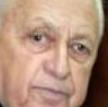
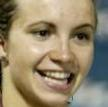
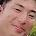
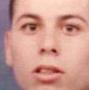
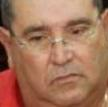
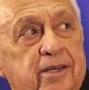
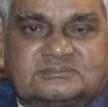
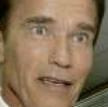
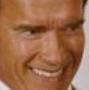
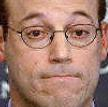
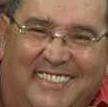
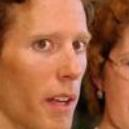
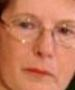
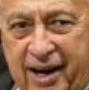
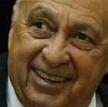
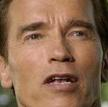

In [100]:
import os
import cv2
import face_recognition
import pandas as pd
from google.colab.patches import cv2_imshow
import numpy as np
from IPython.display import HTML, display
import base64
from PIL import Image
from io import BytesIO

# /images 配下の写真をすべて取得
dir_path = '/content/images'  # Colabに正しくアップロードされたディレクトリに置換え
image_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]

# IDと結果を格納するリスト
face_data = []
known_face_encodings = []
known_face_ids = []
current_id = 0

for image_file in image_files:
    image_path = os.path.join(dir_path, image_file)
    # 画像を読み込み、顔を検出
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)

    for face_encoding, face_location in zip(face_encodings, face_locations):
        # 既存の顔と一致するかチェック
        distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        if len(distances) > 0 and np.min(distances) < 0.6:
            best_match_index = np.argmin(distances)
            face_id = known_face_ids[best_match_index]
        else:
            # 新しいIDを割り振る
            current_id += 1
            face_id = current_id
            known_face_encodings.append(face_encoding)
            known_face_ids.append(face_id)

        # 顔部分を切り出して表示
        top, right, bottom, left = face_location
        face_image = image[top:bottom, left:right]
        face_image_pil = Image.fromarray(face_image)
        buffered = BytesIO()
        face_image_pil.save(buffered, format="JPEG")
        face_image_base64 = base64.b64encode(buffered.getvalue()).decode()
        face_image_html = f'<img src="data:image/jpeg;base64,{face_image_base64}" width="100" height="100">'

        # 結果に追加
        face_data.append([face_id, image_file, face_image_html])

# 結果を表示するためのDataFrameを作成
face_df = pd.DataFrame(face_data, columns=["ID", "ファイル名", "顔写真"])

# DataFrameをHTMLで表示
def display_dataframe_as_html(df):
    return display(HTML(df.to_html(escape=False)))

display_dataframe_as_html(face_df)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')